In [1]:
# Libraries and constants
import numpy as np
import matplotlib.pyplot as plt 
import time 
from sklearn import linear_model
from termcolor import colored
from math import sin , pi

max = 100
tests = 1000

In [2]:
# Testing functions
def crete_data(features,samples):

    a = np.random.rand(samples,features)
    x = np.random.rand(features)
    b = np.random.rand(samples)

    y = a @ x + b

    # ax + b = y
    return a , y

def test_algorithns( objs , samples ):

    proportions = []
    inv_proportions = []
    durations = []
    scores = []
    
    percentage=1

    for i in range(samples) :
        
        if ( 100 * ( (i+1) / samples ) >= 10*percentage ) : 
            print(colored("    ",on_color="on_blue"),end="",flush=True)
            percentage+=1

        n = np.random.randint(1,max)
        m = np.random.randint(1,max)
        
        a , y = crete_data(n,m)
        
        proportion = []
        inv_proportion = []
        duration = []
        score = []

        for j in range(len(objs)) :

            start = time.time()
            objs[j].fit(a,y)
            duration += [time.time() - start]

            # Detalhe importante sobre o intercepto
            y_found = objs[j].predict(a)
            score += [np.linalg.norm(y_found - y)]
            proportion += [m/n]
            inv_proportion += [n/m]

        proportions += [proportion]
        inv_proportions += [inv_proportion]
        durations += [duration]
        scores += [score]

    print()
    return np.array(proportions) , np.array(inv_proportions) , np.array(scores) , np.array(durations)

In [3]:
# Grafical Function
def plot_data_3d(x1 , x2 , y , z , title):
    
    plt.scatter(x1, y, c=z, cmap='magma')
    plt.title(title)
    plt.xlabel("Proportions - (m/n)")
    plt.ylabel("Scores - ||y_found - y_real||")
    plt.colorbar(label='Time of execution - seconds')
    plt.show()

    plt.scatter(x2, y, c=z, cmap='magma')
    plt.title(title)
    plt.xlabel("Proportions - (n/m)")
    plt.ylabel("Scores - ||y_found - y_real||")
    plt.colorbar(label='Time of execution - seconds')
    plt.show()

    return 

| Os codigos comecaram a ser testados! |
                                        
| Os codigos acabaram de ser testados! |


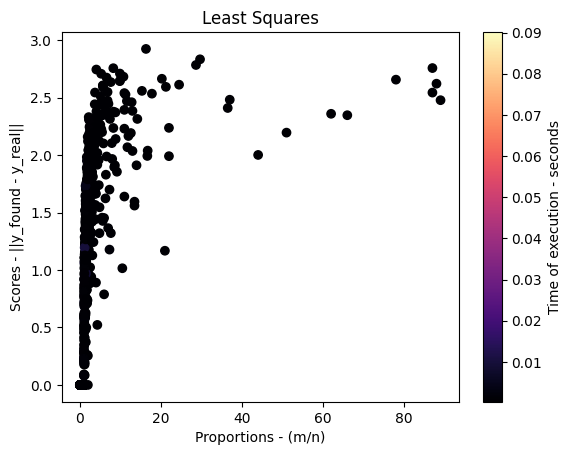

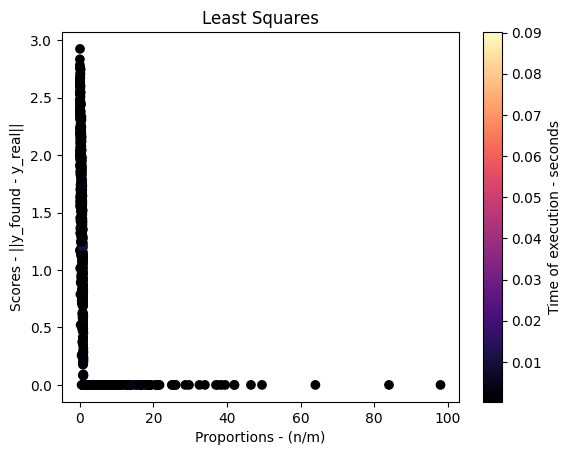

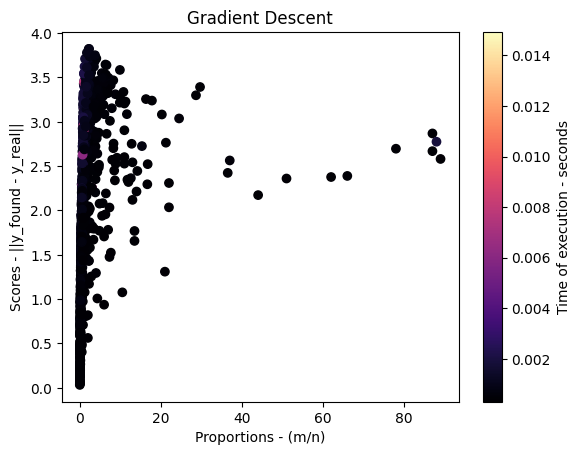

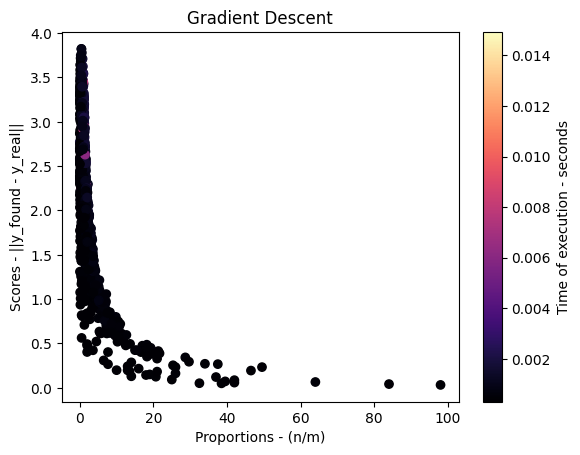

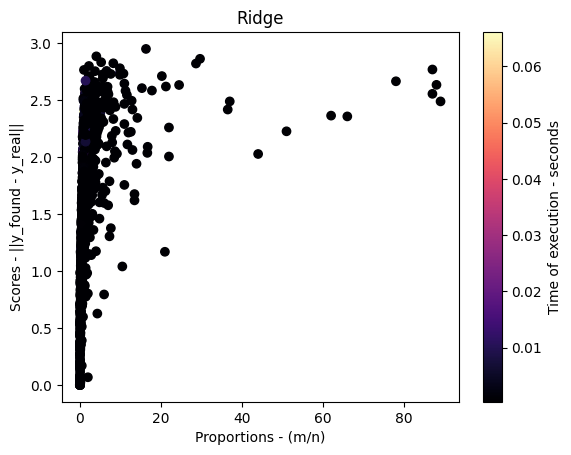

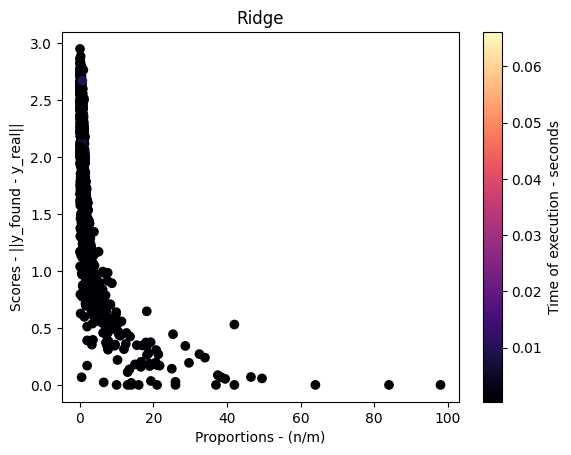

In [4]:
# main 
names = ( "Least Squares" , "Gradient Descent" , "Ridge" )
objs  = ( linear_model.LinearRegression() , linear_model.SGDRegressor() , linear_model.Ridge()  )

print("| Os codigos comecaram a ser testados! |")
a , a_ , b , c = test_algorithns( objs ,tests)
print("| Os codigos acabaram de ser testados! |")

for i in range(len(objs)):
    plot_data_3d( a[:,i] , a_[:,i] , b[:,i] , c[:,i] , names[i] )
